Guilherme Marim da Silva - RA: 232092 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from sympy import *

In [2]:
# fw(u) function for Concave flux
def fw_concave_flux(u,M): 
    return u/(u + (1-u)/M)

In [3]:
# derivada de primera ordem de fw(u), em relação a u para fluxo concavo
def diff_fw_concave_flux(u,M):
    u_symbol = symbols('u')
    
    eq_fw = u_symbol/(u_symbol + ((1-u_symbol)/M))    
    fw = lambdify(u_symbol, eq_fw, 'numpy')
    
    eq_fw_linha = eq_fw.diff(u_symbol)    
    fw_linha = lambdify(u_symbol, eq_fw_linha, 'numpy')
    
    return fw_linha(u)

In [4]:
# fw(u) function for Non-convex flux
def fw_non_convex_flux(u,M): 
    return (u**2)/((u**2) + ((1-u)**2)/M)

In [5]:
# derivada de primera ordem de fw(u), em relação a u para fluxo não convexo
def diff_fw_non_convex_flux(u,M):
    u_symbol = symbols('u')
    
    eq_fw = (u_symbol**2)/((u_symbol**2) + ((1-u_symbol)**2)/M)
    fw = lambdify(u_symbol, eq_fw, 'numpy')
    
    eq_fw_linha = eq_fw.diff(u_symbol)    
    fw_linha = lambdify(u_symbol, eq_fw_linha, 'numpy')
    
    return fw_linha(u)

In [6]:
# fw(u) function for Convex flux
def fw_convex_flux(u): 
    return (u**2)

In [7]:
# u(x,t) for Concave flux
def u_concave_flux(x,t,M):     
    if x > M*t:
        return 0
    elif x >= t/M:
        return ((M*t/(x+0.000001))**(1/2) -1)/(M-1)    
    elif x <= (1/M)*t:
        return 1   

In [8]:
# u(x,t) for Non-convex flux without diffusion term
def u_non_convex_flux_without_diffusion_term(x,t,M):
    u_asterisk = ((2)**(1/2))/2     
    dfdu_u_asterisk = diff_fw_non_convex_flux(u_asterisk,M)
    
    a = (x/t)    
    if a > dfdu_u_asterisk:  
        return 0
    if dfdu_u_asterisk >= a and a >= diff_fw_non_convex_flux(1,M):
        b = (4*a + 1)**(1/2)
        c = -2*a + b - 1
        return (1/2) * (1 + ( c/a + 1 )**(1/2))
        
    if diff_fw_non_convex_flux(1,M) >= a:
        return 1

In [9]:
def plot_data(x_grid, u_final):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    plt.plot(x_grid, u_final[25])
    plt.title('t = 0.25')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)

    plt.subplot(1, 3, 2)
    plt.plot(x_grid, u_final[50])
    plt.title('t = 0.5')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)

    plt.subplot(1, 3, 3)
    plt.plot(x_grid, u_final[75])
    plt.title('t = 0.75')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.show()

In [10]:
M = 2
xf = 1
tf = 1
nx = 100
nt = 100

In [11]:
x_grid = np.linspace(0,xf,nx)
t_grid = np.linspace(0,tf,nt)
u_final_concave = np.ones((nt, nx))

In [12]:
for i in range(u_final_concave.shape[0]):
    for j in range(u_final_concave.shape[1]):
        u_final_concave[i,j] = u_concave_flux(x_grid[j], t_grid[i], M)
u_final_concave.shape

(100, 100)

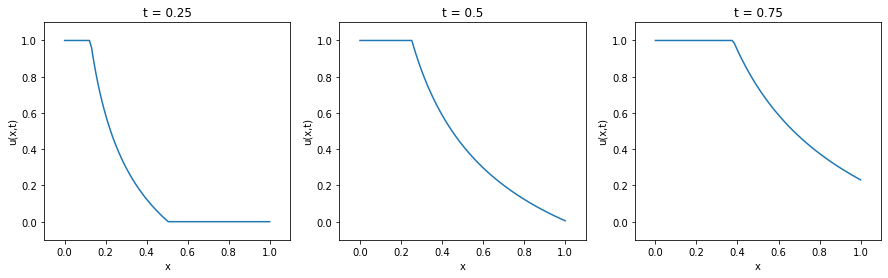

In [13]:
plot_data(x_grid, u_final_concave)

In [14]:
M = 1
xf = 1
tf = 1
nx = 100
nt = 100

In [15]:
x_grid = np.linspace(0,xf,nx)
t_grid = np.linspace(0,tf,nt)
u_final_non_convex = np.ones((nt, nx))

In [16]:
for i in range(u_final_non_convex.shape[0]):
    for j in range(u_final_non_convex.shape[1]):
        u_final_non_convex[i,j] = u_non_convex_flux_without_diffusion_term(x_grid[j], t_grid[i], M)
    print(i)
u_final_non_convex.shape

C:\Users\marim\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\marim\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


0


C:\Users\marim\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(100, 100)

In [17]:
u_final_non_convex[:,0] = 1.0

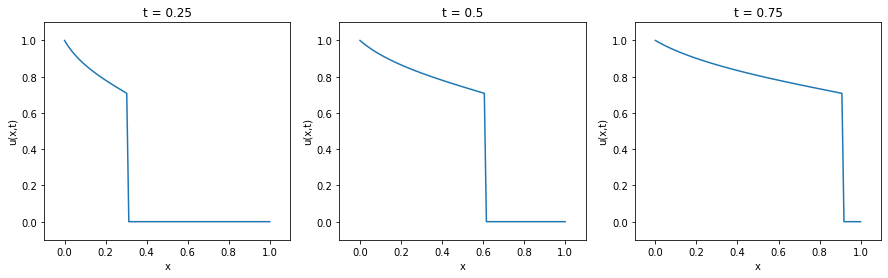

In [18]:
plot_data(x_grid, u_final_non_convex)

In [19]:
u_final_non_convex[90]

array([1.        , 0.99453471, 0.98924113, 0.98410713, 0.97912183,
       0.97427543, 0.96955911, 0.96496483, 0.96048531, 0.9561139 ,
       0.9518445 , 0.94767153, 0.94358985, 0.9395947 , 0.93568171,
       0.93184682, 0.92808624, 0.92439648, 0.92077427, 0.91721654,
       0.91372045, 0.91028332, 0.90690264, 0.90357605, 0.90030134,
       0.89707642, 0.89389931, 0.89076815, 0.88768118, 0.88463674,
       0.88163323, 0.87866917, 0.87574312, 0.87285374, 0.86999972,
       0.86717985, 0.86439295, 0.86163789, 0.85891363, 0.85621912,
       0.85355339, 0.85091551, 0.84830458, 0.84571973, 0.84316014,
       0.84062502, 0.8381136 , 0.83562514, 0.83315894, 0.83071431,
       0.8282906 , 0.82588718, 0.82350342, 0.82113875, 0.81879257,
       0.81646435, 0.81415354, 0.81185963, 0.80958211, 0.80732049,
       0.8050743 , 0.80284308, 0.80062638, 0.79842376, 0.7962348 ,
       0.79405908, 0.79189621, 0.78974579, 0.78760744, 0.78548079,
       0.78336546, 0.78126111, 0.77916737, 0.77708392, 0.77501

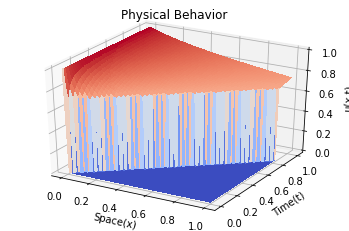

In [20]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, T = np.meshgrid(x_grid, t_grid)

# Plot the surface.
ax.plot_surface(X, T, u_final_non_convex, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Space(x)')
ax.set_ylabel('Time(t)')
ax.set_zlabel('u(x,t)')
plt.title('Physical Behavior')
plt.show()

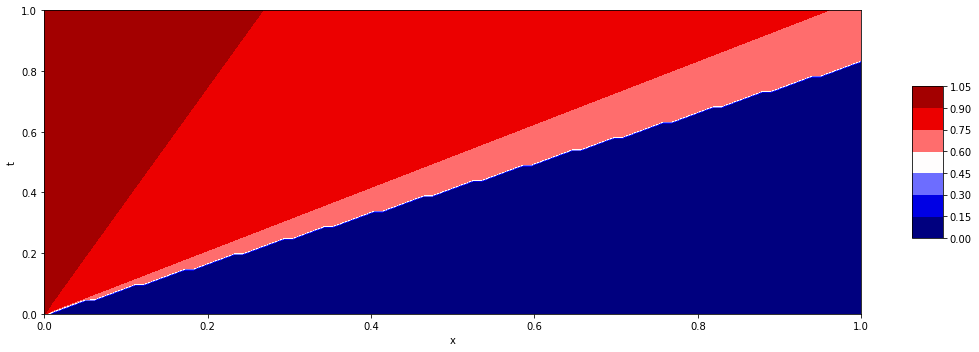

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))

surf = ax.contourf(X, T, u_final_non_convex, cmap=plt.get_cmap("seismic"))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()

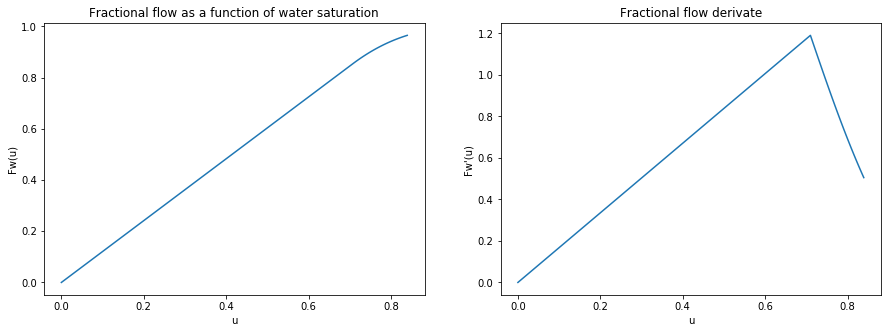

In [22]:
u_grid = u_final_non_convex[:,50]

fw_grid = [fw_non_convex_flux(u,M) for u in u_grid]

diff_fw_grid = [diff_fw_non_convex_flux(u,M) for u in u_grid]

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Fractional flow as a function of water saturation')
plt.xlabel('u')
plt.ylabel('Fw(u)')
plt.plot(u_grid, fw_grid)

plt.subplot(1,2,2)
plt.title('Fractional flow derivate')
plt.xlabel('u')
plt.ylabel("Fw'(u)")
plt.plot(u_grid, diff_fw_grid)
plt.show()

In [23]:
np.save('BL_X.npy', X)
np.save('BL_T.npy', T)
np.save('BL_U.npy', u_final_non_convex)